# Homework #2: classification
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = arff.loadarff('../data/4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
df.drop(columns=['class'], inplace=True)
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
df.describe()

,X01,X02,X03,X04,X05,X06,X07,X08,X09,X10,...,X55,X56,X57,X58,X59,X60,X61,X62,X63,X64
count,9791.000000,9791.000000,9791.000000,9749.000000,9.771000e+03,9791.000000,9791.000000,9773.000000,9792.000000,9791.000000,...,9.792000e+03,9771.000000,9791.000000,9776.000000,9791.000000,9178.000000,9760.000000,9.771000e+03,9749.000000,9561.000000
mean,0.043019,0.596404,0.130959,8.136600,6.465164e+01,-0.059273,0.059446,19.884016,1.882296,0.389040,...,7.686330e+03,-0.992263,0.035022,1.133287,0.856053,118.156064,25.194430,2.015157e+03,8.660813,35.949619
std,0.359321,4.587122,4.559074,290.647281,1.475939e+04,6.812754,0.533344,698.697015,17.674650,4.590299,...,7.605261e+04,77.007971,8.945365,8.038201,26.393305,3230.316692,1099.260821,1.171461e+05,60.838202,483.318623
min,-12.458000,0.000000,-445.910000,-0.045319,-3.794600e+05,-486.820000,-12.458000,-1.848200,-0.032371,-445.910000,...,-7.132200e+05,-7522.100000,-597.420000,-30.892000,-284.380000,0.000000,-12.656000,-1.496500e+04,-0.024390,-0.000015
25%,0.001321,0.263145,0.020377,1.047000,-5.121700e+01,-0.000578,0.003004,0.428300,1.006675,0.294440,...,2.184000e+01,0.003121,0.008768,0.885722,0.000000,5.356325,4.267700,4.323400e+01,2.938800,2.012900
50%,0.041364,0.467740,0.199290,1.591800,-5.557600e-02,0.000000,0.048820,1.088700,1.161300,0.510450,...,9.503300e+02,0.043679,0.098026,0.958305,0.002129,9.482000,6.283550,7.472900e+01,4.848900,4.041600
75%,0.111130,0.689255,0.410670,2.880400,5.573200e+01,0.065322,0.126940,2.691000,1.970225,0.714290,...,4.694550e+03,0.117170,0.242680,0.996163,0.211790,19.506000,9.938200,1.233450e+02,8.363800,9.413500
max,20.482000,446.910000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,53209.000000,1704.800000,12.602000,...,6.123700e+06,112.020000,226.760000,668.750000,1661.000000,251570.000000,108000.000000,1.077900e+07,5662.400000,21153.000000


In [5]:
sum(df.bankruptcy == True)

515

In [6]:
df.fillna(df.mean(), inplace=True)
df.isna().sum()
X_imp = df.values

In [7]:
from sklearn.model_selection import train_test_split

X, y = X_imp[:, :-1], X_imp[:, -1]

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [8]:
import sklearn.preprocessing as skpre

stdsc = skpre.StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
print(X_train_std.shape)
X_test_std = stdsc.transform(X_test)
print(X_test_std.shape)

(6854, 64)
(2938, 64)


## Find the 2 most important features
using Logistic Regression with L1 penalty

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:
y_train.astype('int')

array([0, 0, 0, ..., 0, 0, 0])

In [11]:
C_space = np.logspace(-3,1, 5)
C_space

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [12]:
coef_list = []
for a_C in C_space:
    lr = LogisticRegression(penalty='l1',C=a_C,solver='liblinear').fit(X_train_std,y_train.astype('int')) # complete    
    coef_list.append(lr.coef_[lr.coef_!=0].shape[0])

In [13]:
coef_list

[0, 2, 14, 42, 56]

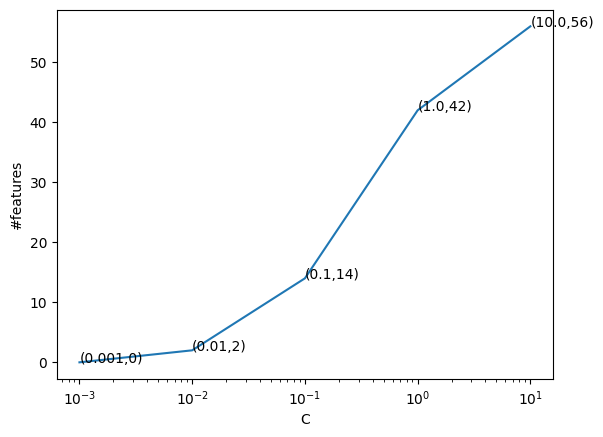

In [14]:
fig,ax = plt.subplots()
ax.plot(C_space,coef_list)
ax.set_xscale('log')
for a_C,a_coef in zip(C_space,coef_list):
    ax.text(a_C,a_coef,f"({a_C},{a_coef})" )
plt.xlabel("C")
plt.ylabel("#features")
plt.show()
plt.close()
    

In [15]:
# redefine X_train_std and X_test_std
lr = LogisticRegression(penalty='l1',C=1e-2,solver='liblinear').fit(X_train_std,y_train.astype('int')) # complete    
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

In [16]:
X_train_std

array([[-0.14493168,  0.41537759],
       [-0.29836374,  0.22252731],
       [ 0.42915505, -0.22985288],
       ...,
       [ 0.49847226, -0.03492693],
       [-0.77156618, -0.09369085],
       [ 0.36499312, -0.01886096]])

## Apply LR / SVM / Decision Tree below

In [17]:
C_space = np.logspace(-3,1, 5)
for a_C in C_space:
    lr = LogisticRegression(penalty='l1',C=a_C,solver='liblinear')
    lr.fit(X_train_std, y_train.astype('int'))
    print('C = ',a_C)
    print('Training accuracy:', lr.score(X_train_std, y_train.astype('int')))
    print('Test accuracy:', lr.score(X_test_std, y_test.astype('int')))
    

C =  0.001
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
C =  0.01
Training accuracy: 0.9474759264662971
Test accuracy: 0.9469026548672567
C =  0.1
Training accuracy: 0.946892325649256
Test accuracy: 0.9469026548672567
C =  1.0
Training accuracy: 0.946892325649256
Test accuracy: 0.9469026548672567
C =  10.0
Training accuracy: 0.946892325649256
Test accuracy: 0.9469026548672567


So C = 0.001 or 0.01 can get better accuracy

In [18]:
C_space = np.logspace(-3,1, 5)
for a_C in C_space:
    svc = SVC(C=a_C)
    svc.fit(X_train_std, y_train.astype('int'))
    print('C = ',a_C)
    print('Training accuracy:', svc.score(X_train_std, y_train.astype('int')))
    print('Test accuracy:', svc.score(X_test_std, y_test.astype('int')))
    

C =  0.001
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
C =  0.01
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
C =  0.1
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
C =  1.0
Training accuracy: 0.9482054274875985
Test accuracy: 0.9472430224642614
C =  10.0
Training accuracy: 0.948497227896119
Test accuracy: 0.9458815520762424


So C = 1.0 or 10.0 can get better accuracy

In [19]:
depth_space = [1,2,4,8]
for a_depth in depth_space:
    decision_tree = DecisionTreeClassifier(max_depth=a_depth)
    decision_tree.fit(X_train_std, y_train.astype('int'))
    print('max_depth = ',a_depth)
    print('Training accuracy:', decision_tree.score(X_train_std, y_train.astype('int')))
    print('Test accuracy:', decision_tree.score(X_test_std, y_test.astype('int')))
    

max_depth =  1
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
max_depth =  2
Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614
max_depth =  4
Training accuracy: 0.9486431281003793
Test accuracy: 0.9455411844792376
max_depth =  8
Training accuracy: 0.9531660344324482
Test accuracy: 0.9417971409121851


## Visualize the classification

In [20]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
#                     c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

<ipython-input-20-76989713ddae>:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


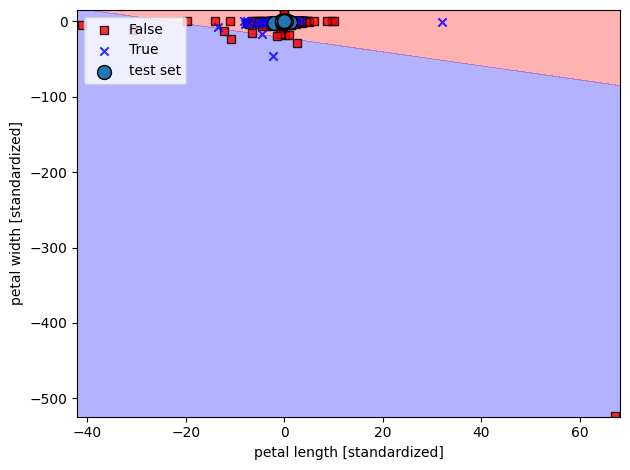

In [21]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [ ]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=svc, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [ ]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=decision_tree, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()